In [1]:
import openturns as ot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from dependence import ConservativeEstimate

%matplotlib inline
%load_ext autoreload
%autoreload 2

random_state = 123
np.random.seed(random_state)

In [2]:
from dependence.tests import func_sum
from dependence import quantile_func

In [63]:
dim = 3
beta = np.asarray([0.1, 1, 5])
test_func = lambda x: func_sum(x, a=beta)
margins = [ot.Uniform()]*dim
families = np.zeros((dim, dim), dtype=int)
for i in range(1, dim):
    for j in range(i):
        families[i, j] = 1

In [64]:
K = 200
n = 20000
vine_structure_1 = [[1, 0, 0],
                    [2, 2, 0],
                    [3, 3, 3]]

vine_structure_2 = [[2, 0, 0],
                    [3, 3, 0],
                    [1, 1, 1]]

vine_structure_1 = np.asarray(vine_structure_1)
vine_structure_2 = np.asarray(vine_structure_2)

In [65]:
ot.RandomGenerator.SetSeed(0)
np.random.seed(0)
q_estimate = ConservativeEstimate(test_func, margins, families, vine_structure=vine_structure_1)
results_1 = q_estimate.gridsearch(K, n, save_grid=True)

The DOE already exist in lhs_p_3_n_200_0.csv


In [66]:
ot.RandomGenerator.SetSeed(0)
np.random.seed(0)
q_estimate = ConservativeEstimate(test_func, margins, families, vine_structure=vine_structure_2)
results_2 = q_estimate.gridsearch(K, n, use_grid=0)

loading file lhs_p_3_n_200_0.csv


In [67]:
alpha = 0.90
q_func = quantile_func(alpha)
results_1.q_func = q_func
results_2.q_func = q_func
results_1.min_quantity, results_2.min_quantity

(3.1188334494872745, 3.1351481269298596)

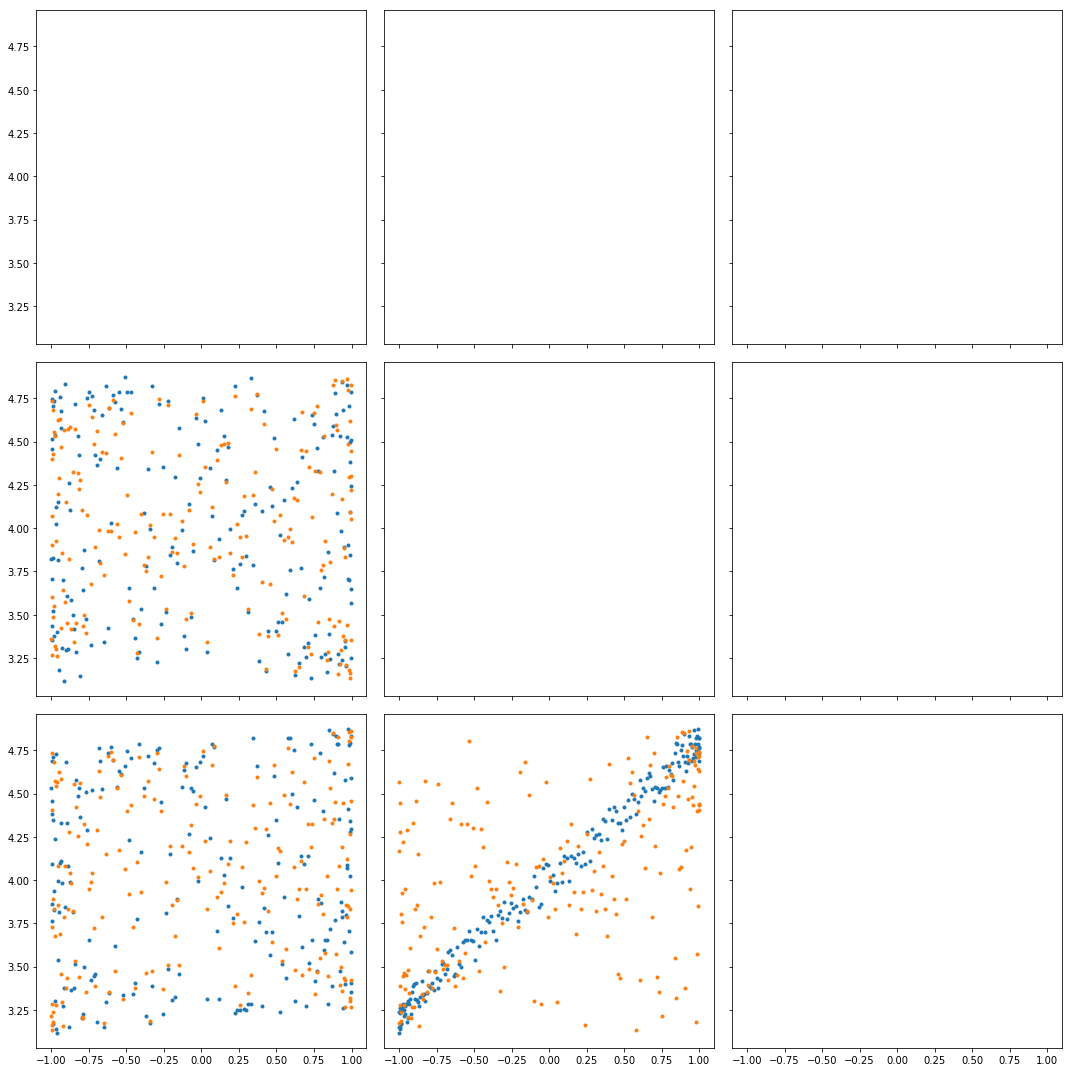

In [68]:
fig, axes = plt.subplots(dim, dim, figsize=(15, 15), sharex=True, sharey=True)

k = 0
for i in range(1, dim):
    for j in range(i):
        ax = axes[i, j]
        for results in [results_1, results_2]:
            params_k = results.dep_params[:, k]
            quantities_k = results.quantities
            ax.plot(params_k, quantities_k, '.')
        k += 1
        
fig.tight_layout()

In [23]:
from dependence.dependence import VineCopula

In [24]:
params = np.zeros((dim, dim))
for i in range(1, dim):
    for j in range(i):
        params[i, j] = 0.5
vine = VineCopula(vine_structure_1, families, params)
vine.get_sample(n)

array([[ 0.0708344 ,  0.19193525,  0.39286554],
       [ 0.68429251,  0.40840071,  0.78481691],
       [ 0.23532324,  0.85971552,  0.3572541 ],
       ..., 
       [ 0.50292567,  0.36493187,  0.76663684],
       [ 0.47895433,  0.31376577,  0.30603215],
       [ 0.80414607,  0.67472695,  0.56622496]])